# Adnan Ahmed's Notebook

In [3]:
#Importing necessary modules
import project_functions3 as pf
import seaborn as sns

## Exploratory Data Analysis

Research Question: 
 - What types of crimes occur in which Neighbourhood, and which neighbourhood is arguably the safest?

## 1) Understanding the Variables

Vancouver's historical crime data has been referred to as this projects' dataset. The libraries required are first imported so that the files can be opened and the analysis can begin in the code below. The CSV file is read using `pandas` into a variable called `df`.

In [4]:
# Load Data
df = pf.load("../data/raw/crimedata_csv_all_years.csv")

# Displays the first 5 rows of the datasheet
pf.head(df)

,Type,Year,Month,Day,Hour,Minute,Hundred Block,Neighbourhood,X,Y
0,Theft from Vehicle,2006,3,4,20,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
1,Theft from Vehicle,2006,3,5,11,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
2,Theft from Vehicle,2006,4,16,0,1,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
3,Theft from Vehicle,2006,6,11,17,45,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
4,Theft from Vehicle,2006,8,5,20,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06


`.head()` returns the first 5 rows of the dataset. From the 10 columns that are visible, type of crime, year, month, day, hour, minute, hundred block, neighbourhood, and the x and y coordinates are all present. To make sure that there are no hiddden columns in the dataset, the `.shape()` function is used. At a glance, only `Theft from Vehicle` seems to be the only type of crime being committed in the same hundred block, neighbourhood, and x and y coordinates; but at different times. Since only the first 5 columns are shown, it is highly likely that there will be other locations and types of crime. This will be explored in the analysis section.

In [3]:
# Returns the number of rows and columns in the dataset respectively
pf.shape(df)

(793771, 10)
The number of rows is 793771 and the number of columns is 10


In [4]:
# Returns the titles of head column in the dataset
pf.col(df)

Index(['Type', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Hundred Block',
       'Neighbourhood', 'X', 'Y'],
      dtype='object')


`.col` returns the name of all the columns in the dataset. This confirms that the dataset head displayed contains the same column heads as expected.

`.nunique()` is used to return the number of unique values for each column. When column axis is specified (i.e `axis = 0`), the method will comb through each column and return the number of unique values occuring in each row.

In [5]:
# Gives the number of unique values for each variable
pf.nunique(df)

Type                 11
Year                 19
Month                12
Day                  31
Hour                 24
Minute               60
Hundred Block     22869
Neighbourhood        24
X                139448
Y                139287
dtype: int64


As predictd, there are 10 other types of crime excluding `Theft from Vehicle`. It is also noted that the dataset spans over 19 years, however, it cannot be concluded where the starting and ending year is at the moment. It also appears that the range of data in the hundred block column is quite expansive.

In [6]:
# Summarizes the probability distribution, count, min and max values
pf.numerical(df)

,Year,Month,Day,Hour,Minute,X,Y
count,793771.000000,793771.000000,793771.000000,793771.000000,793771.000000,793771.000000,793771.000000
mean,2011.190138,6.494175,15.393891,12.398277,15.711058,450214.255541,4991404.598120
std,5.528593,3.417050,8.757594,7.445184,18.302174,137501.623612,1524189.154137
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,7.000000,0.000000,490179.749600,5454243.620100
50%,2011.000000,7.000000,15.000000,14.000000,5.000000,491556.822500,5457160.589300
75%,2016.000000,9.000000,23.000000,19.000000,30.000000,493390.042800,5458717.612400
max,2021.000000,12.000000,31.000000,23.000000,59.000000,498306.000000,5462299.731100


`.numerical()` displays a summary of the count, mean, standard deviation, minimum, 25%, 50%, 75% , and maximum of the values for each numeric variable. The code below is used to format each row and supress the scientific notations. Looking at the minimum, and maximum value for `Year`, it can be seen that the dataset starts from 2003 uptil 2021. It can also be seen that the avaerage time at which crimes occur is about 12 noon. The method used is exclusive to numerical values, hence, string data is not provided. Other values are not conclusive enough and need to be analyzed further.

In [7]:
#To find any unique values in the neighbourhood column
pf.discrete(df)

['Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle', 'Vehicle Collision or Pedestrian Struck (with ..., 'Vehicle Collision or Pedestrian Struck (with ..., ..., 'Break and Enter Residential/Other', 'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft']
Length: 11
Categories (11, object): ['Break and Enter Commercial', 'Break and Enter Residential/Other', 'Homicide', 'Mischief', ..., 'Theft of Bicycle', 'Theft of Vehicle', 'Vehicle Collision or Pedestrian Struck (with ..., 'Vehicle Collision or Pedestrian Struck (with ...]
['DAVIE ST / HOWE ST' 'DAVIE ST / JERVIS ST' 'DAVIE ST / MAINLAND ST' ...
 'CYPRESS ST / W 54TH AVE' 'CYPRESS ST / W 57TH AVE'
 'CYPRESS ST / W BROADWAY AV']
['Central Business District', 'West End', 'Shaughnessy', 'Renfrew-Collingwood', 'West Point Grey', ..., 'Marpole', 'Arbutus Ridge', 'South Cambie', 'Musqueam', 'Stanley Park']
Length: 24
Categories (24, object): ['Arbutus Ridge', 'Central Business District', 'Dunbar-Southlands', 'Fairview', .

`.discrete()` is used to show the unique values for each variable in the column. The method here shows the 11 unique string values for the 11 types of crimes recorded in the dataset. Since there are 22869 unique values in the `Hundred Block` column, only a few are printed.

## 2. Dataset cleaning

This section focuses on cleaning the dataset to curb any misleading data, as well as, removing any unused columns. The process will remove redundant variables, help make better variable selection, remove any outliers, and also remove rows with null values.

Having a concise dataset will help in removing distractions. The goal to find **"What types of crimes occur in which Neighbourhood, and which neighbourhood is arguably the safest?"** will be assisted through this section. In this case, as there would be a heavy emphasis on location, the variables that contain information about the crime times become somewhat irrelevant. Columns such as year, month, day, hour, and minute are excluded.  

To ensure that no null values are present that may affect the analysis, the following steps are used. The last step is  removing rows with null values, however, since there are no existing null values in the dataset no further data altering is required.

In [8]:
# Generate preview of entries with null values
pf.preview(df)

In [9]:
# Generates the count statistics of duplicate entries
pf.duplicates(df)

No. of duplicated entries:  27593
                            Type  Year  Month  Day  Hour  Minute  \
334046  Offence Against a Person  2003      1    1     0       0   
335446  Offence Against a Person  2003      1    1     0       0   
337371  Offence Against a Person  2003      1    1     0       0   
339289  Offence Against a Person  2003      1    1     0       0   
358836  Offence Against a Person  2003      1    1     0       0   

                    Hundred Block              Neighbourhood    X    Y  
334046  OFFSET TO PROTECT PRIVACY  Central Business District  0.0  0.0  
335446  OFFSET TO PROTECT PRIVACY  Central Business District  0.0  0.0  
337371  OFFSET TO PROTECT PRIVACY  Central Business District  0.0  0.0  
339289  OFFSET TO PROTECT PRIVACY  Central Business District  0.0  0.0  
358836  OFFSET TO PROTECT PRIVACY  Central Business District  0.0  0.0  


In [6]:
# Removes the columns that are not being used and cleans up the data
df_cleaned = pf.process(df)
display(df_cleaned)

,Type,Hundred Block,Neighbourhood,X,Y
237960,Mischief,0K E CORDOVA ST,Strathcona,493672.9069,5.458814e+06
590992,Theft from Vehicle,1000D BEACH AVE,Central Business District,490268.4320,5.458143e+06
590993,Theft from Vehicle,1000K CAMBIE ST,Central Business District,491401.1657,5.458161e+06
590994,Theft from Vehicle,1000MARINASIDE CRES,Central Business District,491604.4594,5.457830e+06
398341,Other Theft,100K ALEXANDER ST,Central Business District,492575.4630,5.459006e+06
...,...,...,...,...,...
125241,Vehicle Collision or Pedestrian Struck (with I...,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
125242,Vehicle Collision or Pedestrian Struck (with I...,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
125243,Vehicle Collision or Pedestrian Struck (with I...,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
125244,Vehicle Collision or Pedestrian Struck (with I...,YUKON ST / W KING EDWARD AVE,Riley Park,491835.0000,5.455126e+06


In [7]:
#Write dataset locally to CSV file
pf.write(df_cleaned, '../data/processed/crimedata_Geo.csv')

## 3. Variable Analysis

Use of visualization techniques to understand the variables in the dataset.

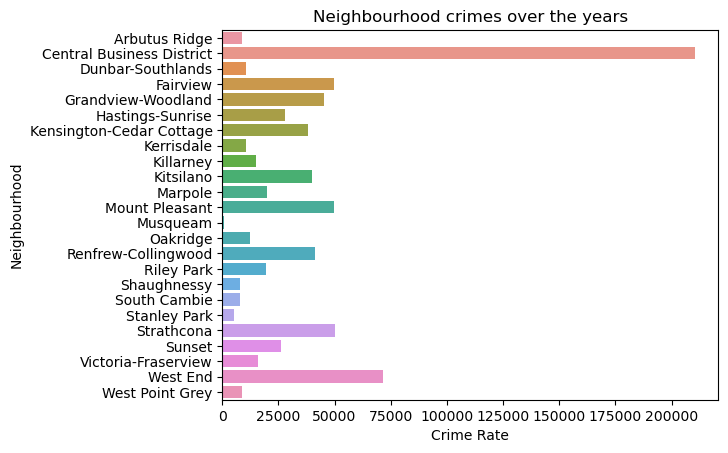

In [11]:
# Provides the visual representation of the frequency of crimes in each neighbourhood
pf.countplot(df_cleaned, 'Neighbourhood', 'Neighbourhood crimes over the years', 'Crime Rate')

From the graph illustrated above, it can be seen that crime rate in the `Central Business District` is the highest, and vastly out matches the crime rate of the second highest in `West End` . More details on what type of neighbourhood is the `Central Business District` , as well as its unique neighbourhood features will be discussed in more detail in following milestones.

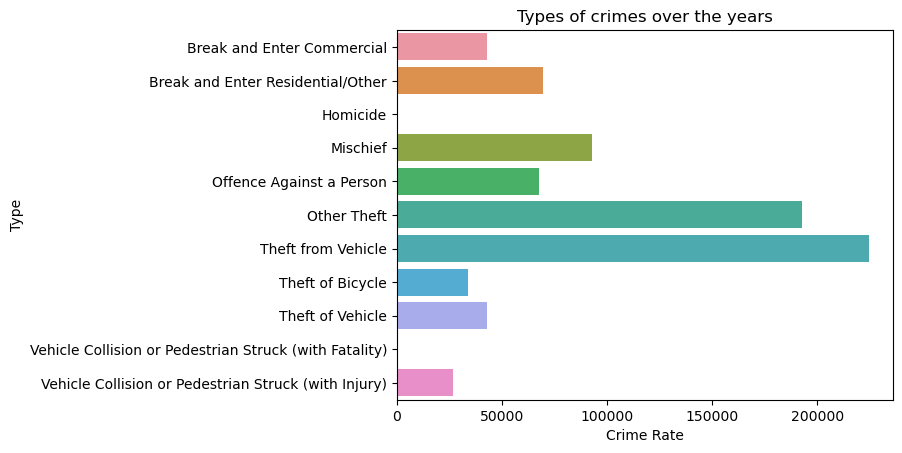

In [12]:
# Provides countplot of Types of crimes
pf.countplot(df_cleaned,'Type','Types of crimes over the years', 'Crime Rate')

From the graph above, it seems that Theft from Vehicles are the most common type of crime. This statistic is followed closely by thefts of other kinds. There is a significant difference in the frequency of thefts compared to other types of crimes. Fatalities in vehicular collision and homicide seems to not be common according to the dataset collected. 

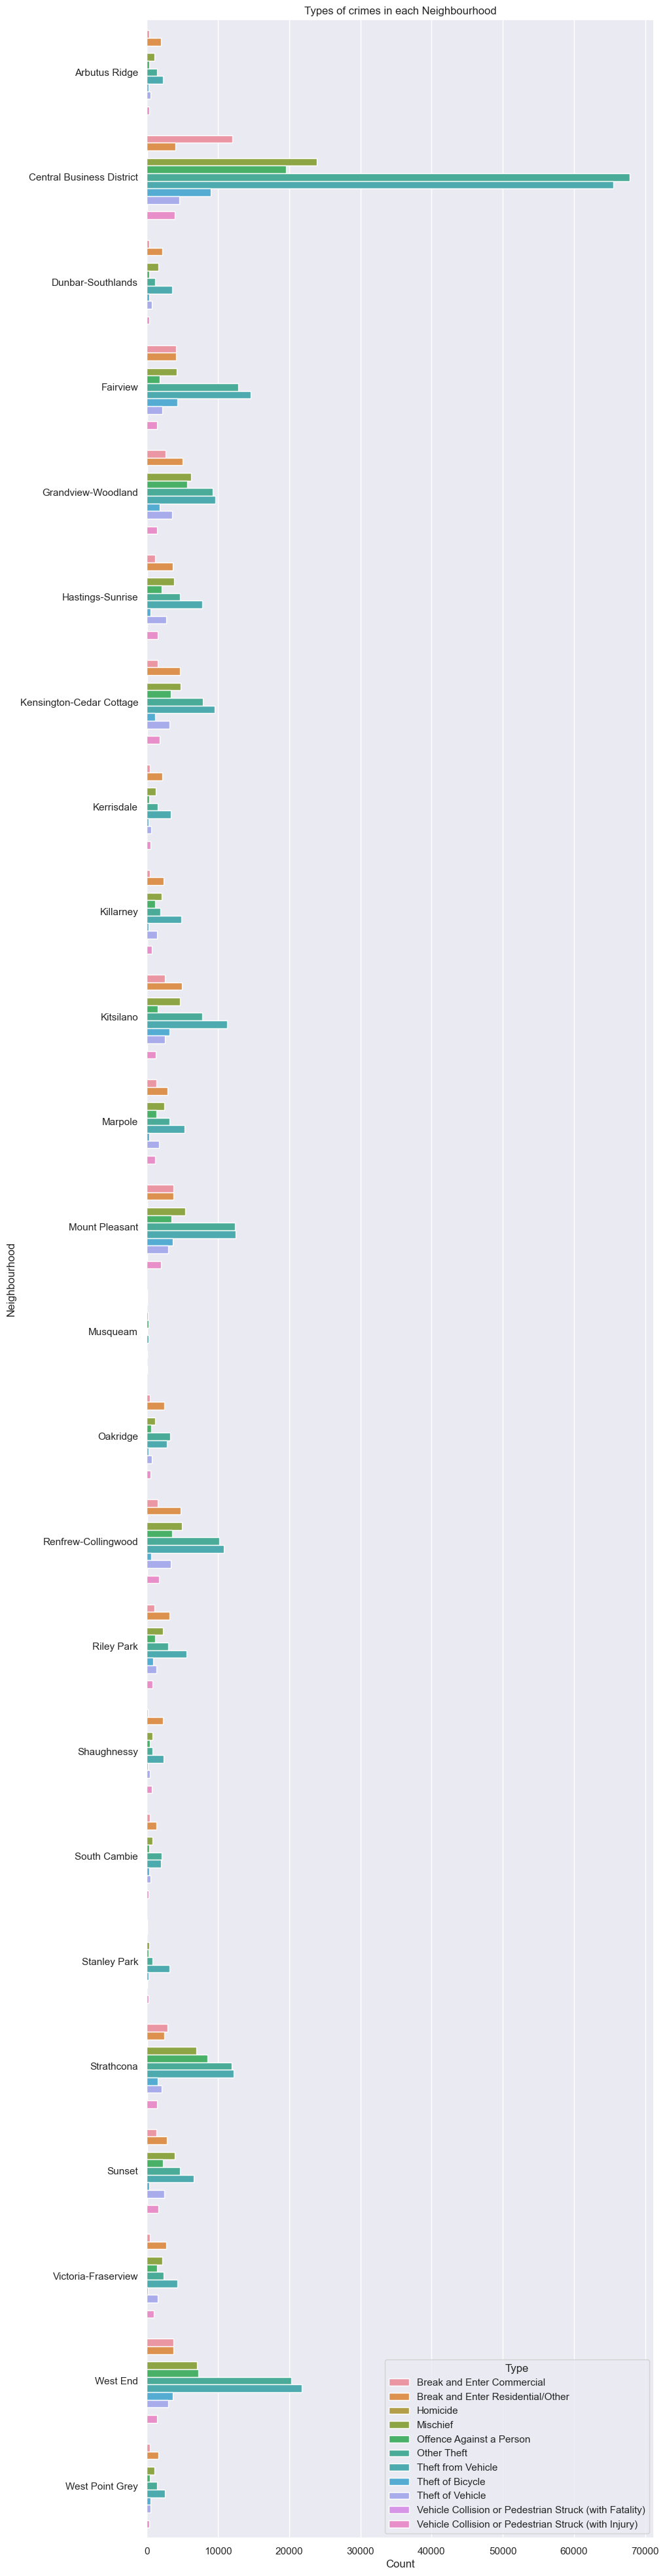

In [9]:
pf.countplothue(df, 'Count', 'Neighbourhood', 'Type', 'Types of crimes in each Neighbourhood')
sns.set(rc = {'figure.figsize':(10, 50)})

From the graph above, it is clearer on what types of crimes happen by neighbourhood. it seems that `Theft from Vehicles` are the most common in the `Central Business District`. `Bicycle Theft` is also very common in the `West End` and it seems `Musqueam` has the lowest crime rates of all sorts. More about these neighbourhoods and the likelyhood of more policing in the areas will be touched upon in future milestones.

## Conclusion

From the data analyzed, it can be concluded that `Musqueam` is arguably the safest in terms of crime rates and crime variaty. The `Central Business District` seems to be more crime riddled, and has a good variaty and frequency of each type of crime. General warnings in leaving cars unoccupied or in one place for too long is ill-advised, as well as leaving bicycles unchained. Reasons for each neighbourhoods' crime rate will be further explored through possible use of heatmaps for frequency and information about points of interest.